# Lab: Convolutions and NumPy Recap

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import scipy
from scipy import signal
from scipy import misc
from scipy import ndimage

#### Convolution of kernel `a` and array `m` is defined as shown on this picture

![convolution](https://www.researchgate.net/profile/Alistair_Mcewan2/publication/255564269/figure/fig1/AS:297866045214735@1448028207647/Convolution-of-a-radius-1-1D-filter-and-an-8-element-input-array-with-one-operation.png)

## Sample input arrays
We will be using the following arrays as sample signals to see the effect of convolution on them. Take a look at those arrays and try to understand how they are defined and why the numpy code generates the shapes shown on the graphs.

In [22]:
triang = np.tile(np.abs(np.arange(25)-12), 4)

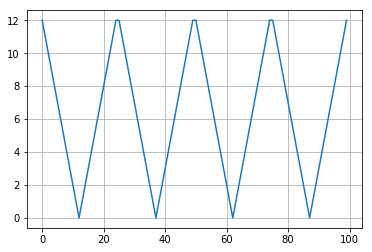

In [23]:
plt.plot(triang)
plt.grid()

In [24]:
sawtooth = np.arange(100) % 25

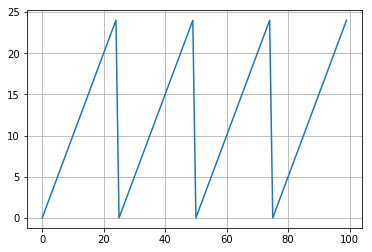

In [25]:
plt.plot(sawtooth)
plt.grid()

In [45]:
bump = np.zeros_like(triang)
bump[45:55] = 1

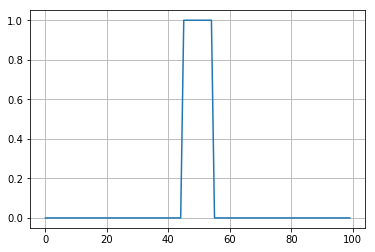

In [46]:
plt.plot(bump)
plt.grid()

## Sample kernels
We will be using the following two kernels to see how the transform the signals above via a convolution.

Try to predict how convolutions of the above arrays with the following kernels will look like. You will get to see the actual graphs later.

In [42]:
kernel1 = np.array([-1, 1])
kernel2 = np.ones(5)/5.

#### Write your own function to compute a convolution of an array `arr` and an array `kernel`. Assume taht kernel is of length 2
Compare your results to `np.convolve()`, remember that np.convolve() flips the kernel before doing the computation.

In [2]:
# Modify this function
# return array of length len(arr)-1 (this is the same as the 'valid' mode of np.convolve())
def myconvolve(kernel, arr):
    if len(kernel) != 2:
        raise ValueError("kernel must be of size 2")
    return ?

#### Plot `myconvolve(kernel1, triang)` and compare it to
`cnv = np.convolve(kernel1, triang, 'valid')`

#### Plot  the convolutions of the sample signals defined above with both kernels using `np.convolve()` are they what you expected?
It's convenient to use the mode `same` if you are plotting the convolved and the original signal on the same plot.

#### Try to smooth out this noisy signal using some kernels appropriate for smoothing
 - the simplest smoothing kernel is np.ones(3)/3
 - add the smoothed line to the same plot

In [141]:
noisy = np.sin(np.arange(60)/3) + np.random.randn(60)/3

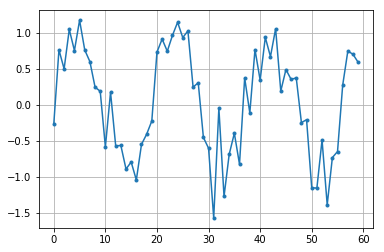

In [146]:
plt.plot(noisy, '.-')
plt.grid()

## 2D convolution
#### For 2D arrays convolution looks like this
![conv2D](http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/1.JPG)
[image source](http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html)

#### We will be using this image that comes as a sample image with SciPy. 
Alternatively you can load any other image using `scipy.misc.imread()`, but make sure to convert it to grayscale image (no colors)

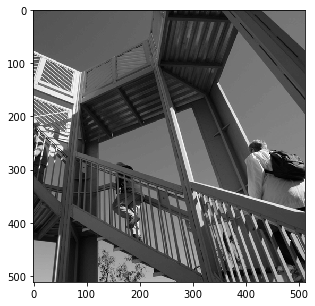

In [53]:
ascent = scipy.misc.ascent()
plt.figure(figsize=(5,5))
plt.imshow(ascent, cmap='gray')

#### Here is an example of a simple convolution applied to this image

In [85]:
k1 = np.array([[ 0, 1, 1],
               [-1, 0, 1],
               [-1,-1, 0]])
k1

array([[ 0,  1,  1],
       [-1,  0,  1],
       [-1, -1,  0]])

In [89]:
# We will also use the flipped version of the kernel
k2 = np.fliplr(k1)
k2

array([[ 1,  1,  0],
       [ 1,  0, -1],
       [ 0, -1, -1]])

#### Try to figure out what areas of the image these kernels highlight

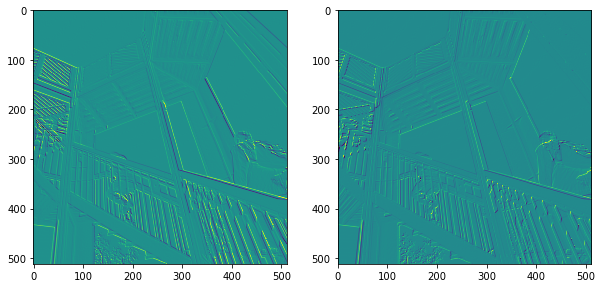

In [88]:
ascent = scipy.misc.ascent()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(scipy.ndimage.convolve(ascent, k1))
plt.subplot(1,2,2)
plt.imshow(scipy.ndimage.convolve(ascent, k2))

#### Here is another example using MNIST digits and the same kernels
Bonus question: why is the background of convolved digits not black?

In [129]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

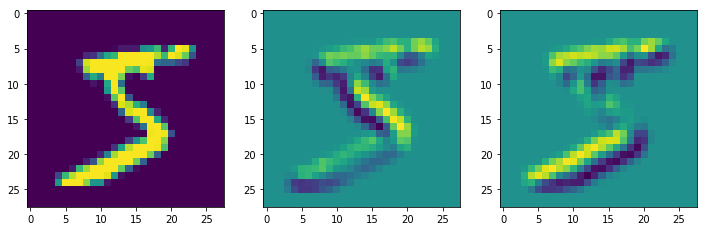

In [133]:
img = x_train[0]/255.
cimg1 = ndimage.convolve(img, k1)
cimg2 = ndimage.convolve(img, k2)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(cimg1)
plt.subplot(1,3,3)
plt.imshow(cimg2)

#### Experiment with the following kernels

In [95]:
k3 = np.array([-1,0,1]) * np.ones((3,1))
k3

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

In [134]:
k4 = k3.transpose()
k4

array([[-1., -1., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.]])

#### Try all of the 3x3 kernels shown on this Wikipedia page on the ascent image and some of the MNIST digits

https://en.wikipedia.org/wiki/Kernel_(image_processing)#Details